## Partie 1

#### Decouvrir les librairies pandas, networkx, folium

In [228]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv

%matplotlib inline

##### TODO: Utilisez la bibliothéque pandas pour lire les fichiers transport-nodes.csv et transport-relationships.csv

In [229]:
transport_nodes = pd.read_csv('data/transport-nodes.csv')
transport_arcs = pd.read_csv('data/transport-relationships.csv')

In [230]:
transport_nodes


,id,latitude,longitude,population
0,Amsterdam,52.379189,4.899431,821752
1,Utrecht,52.092876,5.104480,334176
2,Den Haag,52.078663,4.288788,514861
3,Immingham,53.612390,-0.222190,9642
4,Doncaster,53.522850,-1.131160,302400
5,Hoek van Holland,51.977500,4.133330,9382
6,Felixstowe,51.963750,1.351100,23689
7,Ipswich,52.059170,1.155450,133384
8,Colchester,51.889210,0.904210,104390
9,London,51.509865,-0.118092,8787892


In [231]:
transport_arcs

,src,dst,relationship,cost
0,Amsterdam,Utrecht,EROAD,46
1,Amsterdam,Den Haag,EROAD,59
2,Den Haag,Rotterdam,EROAD,26
3,Amsterdam,Immingham,EROAD,369
4,Immingham,Doncaster,EROAD,74
5,Doncaster,London,EROAD,277
6,Hoek van Holland,Den Haag,EROAD,27
7,Felixstowe,Hoek van Holland,EROAD,207
8,Ipswich,Felixstowe,EROAD,22
9,Colchester,Ipswich,EROAD,32


##### TODO: Construire le graphe et le visualiser avec la fonction from_pandas_dataframe de networkx

C:\Users\Coumbiss\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


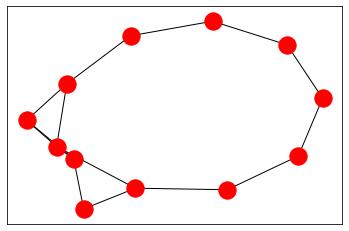

In [232]:
Graphe = nx.Graph()
Graphe = nx.from_pandas_edgelist(transport_arcs, 'src', 'dst',True)
nx.draw_networkx(Graphe, node_color="red", with_labels = False)



In [233]:
dict(Graphe.node)

{'Amsterdam': {},
 'Utrecht': {},
 'Den Haag': {},
 'Rotterdam': {},
 'Immingham': {},
 'Doncaster': {},
 'London': {},
 'Hoek van Holland': {},
 'Felixstowe': {},
 'Ipswich': {},
 'Colchester': {},
 'Gouda': {}}

### TODO: Ajouter des attributs longitude et latitude aux noeuds avec Networkx en utilisant:
* le dictionnaire "node" de networkx qui contient les noeuds
* le dataframe transportnode defini plus haut
* Des exemples d'utilisation de la fonction set_node_attributes
https://www.programcreek.com/python/example/89530/networkx.set_node_attributes

In [234]:
'''
Ajouter des attributs
Inputs: 
    Un graphe, 
    un dataframe contenant les données, 
    nom de l'attribut, 
    le nom de la colonne index du dataframe
Pas d'output:
Utiilisez la fonction set_node_attributes de networkx

'''

def ajouterAttribut(myGraphe, dfnoeuds, nomAttribut, nomIndex):
    listeIndex = list(dfnoeuds[nomIndex])
    listeAttr = list(dfnoeuds[nomAttribut])
    dictio = dict(zip(listeIndex, listeAttr))
    nx.set_node_attributes(myGraphe, dictio, nomAttribut)



In [235]:
ajouterAttribut(Graphe, transport_nodes, "latitude","id")
ajouterAttribut(Graphe,  transport_nodes, "longitude","id" )
ajouterAttribut(Graphe,  transport_nodes, "population","id")

In [236]:
dict(Graphe.node)

{'Amsterdam': {'latitude': 52.379189000000004,
  'longitude': 4.899431,
  'population': 821752},
 'Utrecht': {'latitude': 52.092876000000004,
  'longitude': 5.104480000000001,
  'population': 334176},
 'Den Haag': {'latitude': 52.078663,
  'longitude': 4.288787999999999,
  'population': 514861},
 'Rotterdam': {'latitude': 51.9225,
  'longitude': 4.47917,
  'population': 623652},
 'Immingham': {'latitude': 53.612390000000005,
  'longitude': -0.22219,
  'population': 9642},
 'Doncaster': {'latitude': 53.52285,
  'longitude': -1.13116,
  'population': 302400},
 'London': {'latitude': 51.509865000000005,
  'longitude': -0.118092,
  'population': 8787892},
 'Hoek van Holland': {'latitude': 51.9775,
  'longitude': 4.13333,
  'population': 9382},
 'Felixstowe': {'latitude': 51.96375,
  'longitude': 1.3511,
  'population': 23689},
 'Ipswich': {'latitude': 52.05917, 'longitude': 1.15545, 'population': 133384},
 'Colchester': {'latitude': 51.88921,
  'longitude': 0.9042100000000001,
  'populatio

In [237]:
dict(Graphe.edges)

{('Amsterdam', 'Utrecht'): {'src': 'Amsterdam',
  'dst': 'Utrecht',
  'relationship': 'EROAD',
  'cost': 46},
 ('Amsterdam', 'Den Haag'): {'src': 'Amsterdam',
  'dst': 'Den Haag',
  'relationship': 'EROAD',
  'cost': 59},
 ('Amsterdam', 'Immingham'): {'src': 'Amsterdam',
  'dst': 'Immingham',
  'relationship': 'EROAD',
  'cost': 369},
 ('Utrecht', 'Gouda'): {'src': 'Gouda',
  'dst': 'Utrecht',
  'relationship': 'EROAD',
  'cost': 35},
 ('Den Haag', 'Rotterdam'): {'src': 'Den Haag',
  'dst': 'Rotterdam',
  'relationship': 'EROAD',
  'cost': 26},
 ('Den Haag', 'Hoek van Holland'): {'src': 'Hoek van Holland',
  'dst': 'Den Haag',
  'relationship': 'EROAD',
  'cost': 27},
 ('Den Haag', 'Gouda'): {'src': 'Den Haag',
  'dst': 'Gouda',
  'relationship': 'EROAD',
  'cost': 32},
 ('Rotterdam', 'Gouda'): {'src': 'Gouda',
  'dst': 'Rotterdam',
  'relationship': 'EROAD',
  'cost': 25},
 ('Rotterdam', 'Hoek van Holland'): {'src': 'Hoek van Holland',
  'dst': 'Rotterdam',
  'relationship': 'EROAD',


### Representer les noeuds sur une carte avec Folium

In [238]:
import folium
'''
On construit le Map avec une location par defaut
'''
basemap = folium.Map(
    location=[52.3791890, 4.899431],
    zoom_start=12,
    tiles='Stamen Toner'
)


In [240]:
basemap

### Ajouter des marqueurs pour tous les noeuds du reseau avec folium.Marker

In [241]:
for i in Graphe.node:
    folium.Marker([Graphe.node[i]['latitude'],Graphe.node[i]['longitude']],tooltip = 'Population '+str(Graphe.node[i]['longitude'])).add_to(basemap)
basemap

In [242]:
'''
Cette fonction permet de construire une liste de liste comprenant pour chaque
sous-liste ses coordonnées et celles d'un voisin
Ces points peuvent etre utilisés pour représenter les lignes dans la carte
Input: le graphe
Output: Une liste de couples representant les longitudes et latitudes d'un point et d'un de ses voisins
'''
def construirePointsImage(myGraphe):
    points = []
    for i in myGraphe.node:
        
        for neighbor in myGraphe.neighbors(i):
            S = []
            S.append([myGraphe.node[i]["latitude"],myGraphe.node[i]["longitude"]])
            S.append([myGraphe.node[neighbor]["latitude"],myGraphe.node[neighbor]["longitude"]])
            points.append(S)
    return points
        

In [243]:
coordonneesvoisins = construirePointsImage(Graphe)
coordonneesvoisins

[[[52.379189000000004, 4.899431], [52.092876000000004, 5.104480000000001]],
 [[52.379189000000004, 4.899431], [52.078663, 4.288787999999999]],
 [[52.379189000000004, 4.899431], [53.612390000000005, -0.22219]],
 [[52.092876000000004, 5.104480000000001], [52.379189000000004, 4.899431]],
 [[52.092876000000004, 5.104480000000001], [52.01667, 4.70833]],
 [[52.078663, 4.288787999999999], [52.379189000000004, 4.899431]],
 [[52.078663, 4.288787999999999], [51.9225, 4.47917]],
 [[52.078663, 4.288787999999999], [51.9775, 4.13333]],
 [[52.078663, 4.288787999999999], [52.01667, 4.70833]],
 [[51.9225, 4.47917], [52.078663, 4.288787999999999]],
 [[51.9225, 4.47917], [52.01667, 4.70833]],
 [[51.9225, 4.47917], [51.9775, 4.13333]],
 [[53.612390000000005, -0.22219], [52.379189000000004, 4.899431]],
 [[53.612390000000005, -0.22219], [53.52285, -1.13116]],
 [[53.52285, -1.13116], [53.612390000000005, -0.22219]],
 [[53.52285, -1.13116], [51.509865000000005, -0.118092]],
 [[51.509865000000005, -0.118092], 

### TODO: Visualiser une carte du graphe avec ses noeuds et les arcs sous forme lignes

In [244]:
'''
A faire
Permet de visualiser une carte du graphe avec ses noeuds et les arcs sous forme lignes
Prend en entrée:
- un graphe
- les coordonnées entre chaque point et ses voisins calculées avec la fonction ci-dessus
- Une location par defaut
- Un paramétrage de folium
Output: la carte
'''
        
def visualiserFolium(myGraphe, points, locationpardefaut = [52.3791890, 4.899431],tiles='Stamen Toner' ):
    
    points = construirePointsImage(myGraphe)
    folium.PolyLine(points, color="red").add_to(basemap)
    
    return basemap
    


In [245]:
visualiserFolium(Graphe,coordonneesvoisins)

### Partie 2
* Dans cette partie vous allez implémenter des ADT: Noeud, Graphe, File, Pile


#### Implementer la classe Noeud
* Un noeud a un nom
* Un noeud a des attributs sous forme de dictionnaire pyton avec comme cle:
    une liste de coordonnes ( latitude, longitude)
    
    la taille de la population
* La liste des voisins sera initialisée à la création des arcs dans le graphe 
*  Vous ajouterez toutes les methodes nécessaires

In [246]:
class Noeud:
    def __init__(self,name):
        self.name = name
        self.attributs = {}
        self.listeNomVoisin = []
        
    def setAttribut(self,key, values):
        self.attributs[key] = values
        
        
    def getAttribut(self,key):
        return self.attributs[key]
    
    def getName(self): 
        return self.name
    '''
    Deux noeuds sont egaux s'ils ont même name
    '''
    def egal(self, noeud):
        if self.name == noeud.getName():
            return True
        return False

In [247]:
n1 = Noeud("myNode")
n1.setAttribut("latitude",[12,13,14])
n1.setAttribut("longitude",[34.5,28,19])
n1.setAttribut("population",[100,250,400])


# Afficher le dictionnaire contenant les attributs et leurs valeurs
n1.attributs


{'latitude': [12, 13, 14],
 'longitude': [34.5, 28, 19],
 'population': [100, 250, 400]}

In [248]:
# Afficher les valeurs de l'attribut longitude
n1.getAttribut("longitude")

[34.5, 28, 19]

In [249]:
n2 = Noeud("myNode1")
# comparaison des noeuds n1 et n2
n1.egal(n2)

False

#### Implementer la classe Graphe
* Les noeuds des graphes doivent être initialisé à l'aide du fichier 
transport-node.csv ( vous n'utiliserez plus pandas). Vous initiliserez aussi les attributs
* Les arcs des graphes doivent être initialisé à l'aide du fichier 
transport-relations.csv ( vous n'utiliserez plus pandas). Vous initiliserez aussi les attributs
* On doit pouvoir retrouver les coordonnées d'un noeud grâce à son nom
* On doit avoir la liste des noeuds voisins d'un noeud donné. Le graphe est non orienté donc le voisinage est reciproque
        

In [250]:
class Graphe:
    '''
    Les noeuds seront mis dans une liste
    Les arcs forment un dictionnaire avec comme clé les noms des noeuds et comme valeurs une liste de noeud
    '''
    def __init__(self):
        self.noeuds = []
        self.arcs = {}
    '''
    Creer les noeuds avec un fichier csv
    On peut mettre tous les noeuds dans une liste
    On doit attribuer à chaque noeud ses attributs: latitude, longitude, population
    On initialise le dictionnaire des arcs en creant la cle avec le nom du noeud et la valeur avec une liste vide
    N'oubliez pas de gerer les exceptions
    '''    
    def creerNoeuds(self,fichiernoeuds):
        listeNoeud = []
        latitudeListe = []
        longitudeListe = []
        popListe = []
        listKey = []
        coord = []
        j=0 
        k=1
        listCoord = []
        with open(fichiernoeuds) as csvfile:
            try:
                monFichier = csv.reader(csvfile, delimiter=',')
                liste = []
            except:
                print("Fichier non lu")
                
            for row in monFichier:
                liste.append(row) 
                
        for noeud in liste[1:]:
            node = Noeud(noeud[0])
            listeNoeud.append(node)
            listKey.append(noeud[0])
            coord = [float(noeud[1]), float(noeud[2])] #stocker les coordonnées
            popListe.append(noeud[3])
            listCoord.append(coord)  
                
          
        for i in listeNoeud:
            i.setAttribut("population",popListe[j])   
            i.setAttribut("coordonnees", listCoord[j] )
            j = j+1

        self.noeuds = listeNoeud
      
        while k in range(1, len(listeNoeud)):
            self.arcs[listKey[k]] = []
            k=k+1
        
        print("column Names : " ,liste[0][0], ", ", liste[0][1], ", ", liste[0][2], ", ",liste[0][3])
        print("processed : ", len(self.noeuds), " lines")   
        
    '''
    - Creer les arcs avec un  fichier csv
    - Utilisez un dictionnaire pour les arcs
    - N'oubliez pas que le graphe est non oriente.
    - Pour chaque noeud on mettra des tuples dans la liste de ses voisins: (nom du voisin, cout du chemin)
    - Gerer les exceptions
    '''   
    def creerArc(self, fichierarcs):
        
        listSrc = []
        listDist = []
        listRelation = []
        listCost = []
        with open(fichierarcs) as csvfile:
            try:
                monFichier = csv.reader(csvfile, delimiter=',')
                liste = []
            except:
                print("Fichier non lu")
            for row in monFichier:
                liste.append(row)
            for arc in liste[1:]:
                listSrc.append(arc[0])
                listDist.append(arc[1])
                listRelation.append(arc[2])
                listCost.append(arc[3])
                
                self.arcs[liste[0][0]] = listSrc
                self.arcs[liste[0][1]] = listDist
                self.arcs[liste[0][2]] = listRelation
                self.arcs[liste[0][3]] = listCost
                
            for noeud in self.noeuds:
                for arc in liste:
                    if(noeud.getName() == arc[0]):
                        monTuple = (arc[1], arc[3])
                        noeud.listeNomVoisin.append(monTuple)
        
                        
            print("column Names : " ,liste[0][0], ", ", liste[0][1], ", ", liste[0][2], ", ",liste[0][3])
            print("processed : ", len(liste), " lines")   
    
                
                
                
            
    '''
    Retrouver un noeud à partir de son nom
    '''   
    def getNoeud(self,name):
        for noeud in self.noeuds:
            if(name == noeud.getName()):
                return noeud
        
            
    '''
    Trouver les noeuds voisins d'un noeud donne
    '''
    def getVoisins(self,noeud):
        liste = []
        for node in self.noeuds:
            if(node.egal(noeud)):
                #return node.listeNomVoisin
                for voisin in node.listeNomVoisin:
                    liste.append(voisin[0])
        return liste
    
    '''
    Recuperer pour un noeud donne les latitudes et longitudes de ses voisins
    Constituer des pairs de listes de coordonnées entre le point et ses voisins
    pour une representation sous folium
    
    '''
    def getCoordonnesVoisins(self, noeud):
        listecoord = []
        # voise est un tuple et je veux recuperer le nom du noeud voisin 
        # qui est le premier element du tuple
        
        for voise in self.getVoisins(noeud):
            # Recupere un noeud voisin
            noeudVoisin = self.getNoeud(voise)
            listecoord.append([noeud.getAttribut('coordonnees'),noeudVoisin.getAttribut('coordonnees')])
        return listecoord
    
    '''
    Recuperer les coordonnees d'une liste de neouds pour visualiser sous folium
    Prend en entrée une liste de nom de noeud
    Retourne une liste de sous-listes à deux elements de coordonnées
    '''
    def getListeCoordonnees(self,listeNoeuds):
        coord = []
        for name in listeNoeuds:
            coord.append(self.getNoeud(name).getAttribut('coordonnees'))
        return coord
    
    '''
    Visualiser les noeuds et les arcs sous folium
    Entree: le parametre explored sera utilisé pour les parcours de graphe
    '''
    
    def visualiserFolium(self, locationpardefaut = [52.3791890, 4.899431],tiles='Stamen Toner',explored = None ):
    
        basemap = folium.Map(location= locationpardefaut,zoom_start=6,tiles=tiles)
        
        
        
        for i in self.noeuds:
            
            folium.Marker(i.getAttribut('coordonnees'),tooltip = 'Population '+str(i.getAttribut('population'))).add_to(basemap)
            locations = self.getCoordonnesVoisins(i)
            if len(locations)!= 0:
                folium.PolyLine(self.getCoordonnesVoisins(i), color="red", weight=2.5, opacity=1).add_to(basemap)
        if explored != None:
            folium.PolyLine(self.getListeCoordonnees(explored), color="green", weight=2.5, opacity=1).add_to(basemap)
        return basemap

In [251]:
G = Graphe()
print(G.creerNoeuds("data/transport-nodes.csv"))

column Names :  id ,  latitude ,  longitude ,  population
processed :  12  lines
None


In [252]:
G.creerArc("data/transport-relationships.csv")
G.arcs;
G.getVoisins(Noeud("Amsterdam"))

column Names :  src ,  dst ,  relationship ,  cost
processed :  16  lines


['Utrecht', 'Den Haag', 'Immingham']

In [253]:
G.visualiserFolium()

### Partie 4
* Implementer les classes File et Pile en utilisant les list en python




In [254]:
class Pile():
    '''
    Classe Pile: voir les definitions ci-dessous
    La classe dispose d'une structure de type list pour ranger les données
    Les consultations, les insertions, les suppressions se font du même cote
    Dernier arrive premier servi : LIFO
    '''
    def __init__(self):
        self.elements = []
    '''
    Insere un objet en tete de la pile
    '''
    def push(self,noeud):
        self.elements.append(noeud)
    '''
    Retourne True si  un noeud est dans la pile
    '''
    
    def contains_noeud(self, name):
        for i in self.elements:
            if(i.getName() == name):
                return 
        return False
                
    '''
    Retourne true si la pile est vide
    '''
    def empty(self):
        if(len(self.elements)==0):
            return True
        return False
        
    '''
    Retourne et supprime l'element en tete de pile
    Retourne une exception si la pile est vide
    '''
    def remove(self):
        try:
            return self.elements.pop()
        except:
            print ("Error : la pile est vide")



In [255]:
pile = Pile()

#Ajouter en tete de pile
pile.push(G.noeuds[0])
pile.push(G.noeuds[1])
pile.push(G.noeuds[2])

#Vérifier si la pile contient un noeud de nom Amsterdam
print(pile.contains_noeud(G.noeuds[0]))

#verifier si la pile est vide
print(pile.empty())

#retourne le noeud en tete supprimé de la pile 
print(pile.remove().getName())

#supprimer l'entete d'une pile vide
p = Pile()
p.remove()

False
False
Den Haag
Error : la pile est vide


In [256]:
class File(Pile):
    
    '''
    Classe File: voir les definitions ci-dessous
    La classe dispose d'une structure de type list pour ranger les données
    Les éléments sont enfilés (insérés) du coté arrière et défilés (retirés)
    du coté avant
    Premier arrive premier servi : FIFO
    File et Pile peuvent partager certaines methodes donc utilisez l'heritage pour definir
    la classe File. 
    Normalement vous ne devez changer l'implementation d'une seule methode
    '''
   
        
    def remove(self):
        first = self.elements[0]   #recupérer la première entrée
        del (self.elements[0]) #supprimer cet élément de la liste
        return first

In [257]:

f = File()
f.push(0)
f.push(1)
f.push(2)
f.push(3)
print("la file: ", f.elements)
print("le premier supprimé: ",f.remove())

la file:  [0, 1, 2, 3]
le premier supprimé:  0


### Partie 4
* Implementer les algorithmes de parcours de graphe: BFS ET DFS
* Algorithme BFS et DFS
https://fr.wikipedia.org/wiki/Algorithme_de_parcours_en_largeur
https://fr.wikipedia.org/wiki/Algorithme_de_parcours_en_profondeur
Les deux parcours utilisent le même algorithme mais différent suivant la structure de données utilisée comme frontiére. La frontiére est une structure de données qui permet manipuler les noeuds intermediaires. 
#### Algorithme
* On met le noeud source dans la frontiére
* On cree une structure vide devant contenir les noeuds explorés
* Repeter
    * Si la frontiere est vide pas de solution
    * Prendre un noeud dans la frontiere ( idée de suppression)
    * Si le noeud est le noeud destination alors solution
    * Sinon:
        * Mettre le noeud dans l'ensemble des noeuds deja explorés
        * Ajouter les voisins dans la frontiére s'ils ne sont pas dans la frontiere et s'ils ne sont pas deja explores


In [258]:
'''
Implémenter le parcours en profondeur non recursif entre deux noeuds
Prend en parametre:
- un graphe
- un noeud source
- un noeud destination
Output:
une liste contenant les noms des noeuds explorés pour aller du noeud source vers le noeud destination 
Vous completerez certaines parties du code
'''

def parcoursDFS(myGraphe,noeudSRC,noeudDST):
        """Trouver un parcours DFS entre noeudSRC et noeudDST"""

        # Le nombre de noeuds explorés
        num_explored = 0

        # Initialisation de la frontiere avec le noeud source
        
        frontiere = Pile() 
        frontiere.push(noeudSRC)

        # Initialisation de la liste des noeuds explorés
        explored = set()

        # On boucle jusqu'à trouver la solution
        while True:

            # S'il n'y a aucun noeud dans la frontiére alors pas de solution
            if frontiere.empty():
                raise Exception("no solution")

            # Choisir un node dans la frontiere
            node = myGraphe.noeuds[num_explored]
            num_explored += 1

            # Si ce noeud est le noeud destination
            if node.egal(noeudDST):
                
                # Ajouter le aux noeuds deja explorés
                explored.add(noeudDST.name)
                
                return explored, num_explored

            # Marquer le noeud comme explore
            explored.add(node.name)

            # Ajouter tous les voisins du noeud à la frontiere
            for n in myGraphe.getVoisins(node):
                if not frontiere.contains_noeud(Noeud(n)) and Noeud(n) not in explored:
                    frontiere.push(Noeud(n))



In [259]:
# Visualisation des arcs en rouge et visualisation des noeuds parcourus pour aller du premier au deuxieme noeud en vert
G.visualiserFolium(explored = list(parcoursDFS(G,G.noeuds[0],G.noeuds[1])[0]))

In [260]:
#### TODO: Implementer le parcours en profondeur recursif et calculer le coût du chemin
# Initialisation de la frontiere avec le noeud source

frontiere = Pile()
# Initialisation de la liste des noeuds explorés
explored = set()

def parcoursDFS_recursif(myGraphe, noeudSRC, noeudDST, num_explored=0):
    """Trouver un parcours DFS entre noeudSRC et noeudDST"""

    frontiere.push(noeudSRC)

    # Initialisation de la liste des noeuds explorés
    explored = set()
    if frontiere.empty():
            raise Exception("no solution")

    # Choisir un node dans la frontiere
    node = myGraphe.noeuds[num_explored]
    num_explored += 1
    
    # Si ce noeud est le noeud destination
    if node.egal(noeudDST):    
        # Ajouter le aux noeuds deja explorés
        explored.add(noeudDST.name)  
        return explored, num_explored

    # Marquer le noeud comme explore
    explored.add(node.name)

    # Ajouter tous les voisins du noeud à la frontiere
    for n in myGraphe.getVoisins(node):
        if not frontiere.contains_noeud(Noeud(n)) and Noeud(n) not in explored:
            frontiere.push(Noeud(n))
            #appel recursif
            parcoursDFS_recursif(myGraphe,Noeud(n),noeudDST, num_explored)
    return explored,num_explored


In [261]:
G.visualiserFolium(explored = list(parcoursDFS_recursif(G,G.noeuds[0],G.noeuds[1])[0]))

#### TODO: Implementer le parcours BFS et calculer le coût du chemin


In [262]:
'''
Implémenter le parcours en largeur non entre deux noeuds
'''

def parcoursBFS(myGraphe,noeudSRC,noeudDST):
    
    """Trouver un parcours DFS entre noeudSRC et noeudDST"""
    
    # Le nombre de noeuds explorés
    num_explored = 0

    # Initialisation de la frontiere avec le noeud source

    frontiere = File() 
    frontiere.push(noeudSRC)

    # Initialisation de la liste des noeuds explorés
    explored = set()

    # On boucle jusqu'à trouver la solution
    while True:

        # S'il n'y a aucun noeud dans la frontiére alors pas de solution
        if frontiere.empty():
            raise Exception("no solution")

        # Choisir un node dans la frontiere
        node = myGraphe.noeuds[num_explored]
        num_explored += 1

        # Si ce noeud est le noeud destination
        if node.egal(noeudDST):

            # Ajouter le aux noeuds deja explorés
            explored.add(noeudDST.name)

            return explored, num_explored

        # Marquer le noeud comme explore
        explored.add(node.name)

        # Ajouter tous les voisins du noeud à la frontiere
        for n in myGraphe.getVoisins(node):
            if not frontiere.contains_noeud(Noeud(n)) and Noeud(n) not in explored:
                frontiere.push(Noeud(n))



In [263]:
G.visualiserFolium(explored = list(parcoursBFS(G,G.noeuds[0],G.noeuds[1])[0]))

### Partie 5
* Implementer les algorithmes A star où le choix se portera sur le voisin ayant le plus petit coût



#### TODO: Implementer le parcours avec l'algorithme du Greedy Best First Search. Vous calculerez les coûts de chape noeud par rapport 
au noeud destination

#### TODO: Implementer le parcours avec l'algorithme du A*. Vous calculerez les coûts de chape noeud par rapport 
au noeud destination et au noeud origine

https://www.mygreatlearning.com/blog/best-first-search-bfs/

In [264]:
def BFS(myGraphe, noeudSRC, noeudDST):
    ouvert = []
    ferme = []
    ouvert.append(noeudSRC)
    while True:
        if not ouvert:
            return False
        N = ouvert[0]
        ferme.append(N)
        if N.egal(noeudDST):
            ferme.append(N)
            return True
        for V in myGraphe.getVoisins(N):
            ouvert.append(Noeud(V))
        
    